In [29]:
import statsmodels.api as sm

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np

### Data Processing

- Also drop unimportant rows and convert variables to dummy if applicable

In [40]:
df = pd.read_csv('child-parent_network_cleaned.csv', header=0)
df = df.drop(['att_check'], axis=1)
df['mother_activation_dummy'] = np.where(df['mother_activation']=='no_use', '0', '1')
df['father_activation_dummy'] = np.where(df['father_activation']=='no_use', '0', '1')
df['e_gender_dummy'] = np.where(df['e_gender']=='Male', '1', '0')
df['e_race_dummy'] = np.where(df['e_race']=='White', '1', '0')
df['mother_class_high'] = [1 if a==4 or a==3 else 0 for a in df['mother_class']]
df['father_class_high'] = [1 if a==4 or a==3 else 0 for a in df['father_class']]
df['e_class_high'] = [1 if a==4 or a==3 else 0 for a in df['e_class']]

In [41]:
# Tie strength draft
df['mother_tie_strength'] = df[['mother_closeness', 'mother_contact']].mean(axis=1)
df['father_tie_strength'] = df[['father_closeness', 'father_contact']].mean(axis=1)

### Descriptive Statistics

In [42]:
print("mean: ", df['mother_class_high'].mean())
print("std dev: ", df['mother_class_high'].mean())

mean:  0.5111111111111111
std dev:  0.5111111111111111


In [43]:
print("mean: ", df['father_class_high'].mean())
print("std dev: ", df['father_class_high'].mean())

mean:  0.6222222222222222
std dev:  0.6222222222222222


In [44]:
print("mean: ", df['e_gender_dummy'].mean())
print("std dev: ", df['e_gender_dummy'].mean())

mean:  2.4466913558024692e+42
std dev:  2.4466913558024692e+42


In [45]:
print("mean: ", df['mother_tie_strength'].mean())
print("std dev: ", df['mother_tie_strength'].mean())

mean:  3.2444444444444445
std dev:  3.2444444444444445


In [46]:
print("mean: ", df['father_tie_strength'].mean())
print("std dev: ", df['father_tie_strength'].mean())

mean:  2.888888888888889
std dev:  2.888888888888889


In [47]:
print("mean: ", df['e_race_dummy'].mean())
print("std dev: ", df['e_race_dummy'].mean())

mean:  2.4669111135580248e+42
std dev:  2.4669111135580248e+42


### Plotting basic demographic information

In [48]:
df['e_gender'].value_counts()

Male      31
Female    14
Name: e_gender, dtype: int64

<AxesSubplot:>

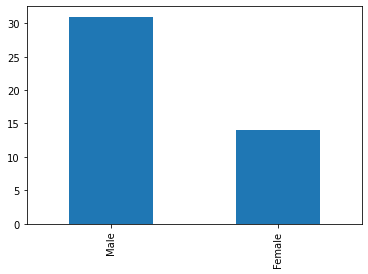

In [49]:
df['e_gender'].value_counts().plot(kind='bar')

In [50]:
df['e_race'].value_counts()

White                        35
Black or African American     6
Asian                         3
Prefer not to say             1
Name: e_race, dtype: int64

<AxesSubplot:>

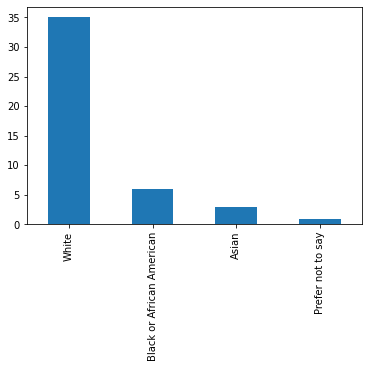

In [51]:
df['e_race'].value_counts().plot(kind='bar')
# There are no respondents who self-reported as Hispanic/Origin in ethnicity.

<AxesSubplot:>

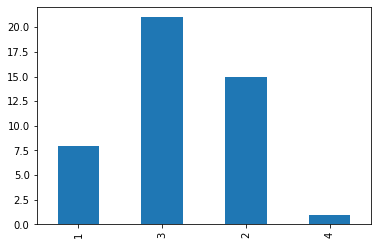

In [52]:
df['e_class'].value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

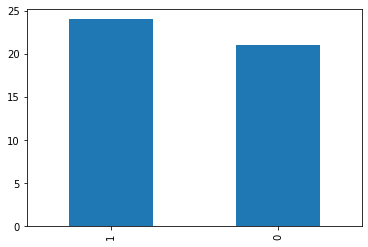

In [53]:
df['father_activation_dummy'].value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

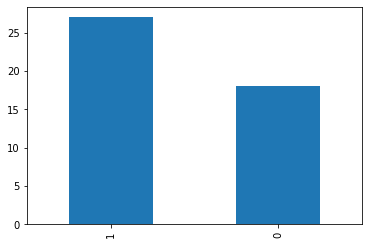

In [54]:
df['mother_activation_dummy'].value_counts(sort=False).plot(kind='bar')

# Logistic regression (controlling for race and gender)

### Analysis for mobilization of mother (original hypothesis)

In [126]:
Xtrain = df[['e_class_high', 'mother_class_high', 'mother_tie_strength','network_size', 'e_race_dummy', 'e_gender_dummy']]
ytrain = df[['mother_activation_dummy']]
  
# building the model and fitting the data
log_reg = sm.Logit(ytrain.astype(int), Xtrain.astype(int)).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.608442
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     mother_activation_dummy   No. Observations:                   42
Model:                               Logit   Df Residuals:                       36
Method:                                MLE   Df Model:                            5
Date:                     Mon, 25 Apr 2022   Pseudo R-squ.:                  0.1090
Time:                             22:41:50   Log-Likelihood:                -25.555
converged:                            True   LL-Null:                       -28.682
Covariance Type:                 nonrobust   LLR p-value:                    0.2822
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
e_class_high            0.8053      0.857      0.9

In [129]:
# Adding father's class
Xtrain = df[['e_class_high', 'father_class_high', 'mother_class_high', 'mother_tie_strength','network_size','e_race_dummy', 'e_gender_dummy']]
ytrain = df[['mother_activation_dummy']]
  
log_reg = sm.Logit(ytrain.astype(int), Xtrain.astype(int)).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.477110
         Iterations 7
                              Logit Regression Results                             
Dep. Variable:     mother_activation_dummy   No. Observations:                   42
Model:                               Logit   Df Residuals:                       35
Method:                                MLE   Df Model:                            6
Date:                     Mon, 25 Apr 2022   Pseudo R-squ.:                  0.3014
Time:                             22:45:37   Log-Likelihood:                -20.039
converged:                            True   LL-Null:                       -28.682
Covariance Type:                 nonrobust   LLR p-value:                  0.008284
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
e_class_high            2.4561      1.334      1.8

### Analysis for father mobilization

In [134]:
# Adding father's class
Xtrain = df[['e_class_high', 'father_class_high', 'mother_class_high', 'father_tie_strength','network_size', 'e_race_dummy', 'e_gender_dummy']]
ytrain = df[['father_activation_dummy']]
  
log_reg = sm.Logit(ytrain.astype(int), Xtrain.astype(int)).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.605351
         Iterations 5
                              Logit Regression Results                             
Dep. Variable:     father_activation_dummy   No. Observations:                   42
Model:                               Logit   Df Residuals:                       35
Method:                                MLE   Df Model:                            6
Date:                     Mon, 25 Apr 2022   Pseudo R-squ.:                  0.1267
Time:                             23:16:31   Log-Likelihood:                -25.425
converged:                            True   LL-Null:                       -29.112
Covariance Type:                 nonrobust   LLR p-value:                    0.2876
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
e_class_high            0.9870      0.927      1.0

In [140]:
# Adding father's class
Xtrain = df[[ 'father_class_high','e_race_dummy', 'e_gender_dummy']]
ytrain = df[['mother_activation_dummy']]
  
log_reg = sm.Logit(ytrain.astype(int), Xtrain.astype(int)).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.677365
         Iterations 4
                              Logit Regression Results                             
Dep. Variable:     mother_activation_dummy   No. Observations:                   42
Model:                               Logit   Df Residuals:                       39
Method:                                MLE   Df Model:                            2
Date:                     Mon, 25 Apr 2022   Pseudo R-squ.:                0.008116
Time:                             23:27:25   Log-Likelihood:                -28.449
converged:                            True   LL-Null:                       -28.682
Covariance Type:                 nonrobust   LLR p-value:                    0.7923
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
father_class_high    -0.4014      0.546     -0.735    